# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from citipy import citipy

#  Open Weather API key
from api_keys import weather_api_key

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

lats_lngs = []
cities = []


lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lat, lng)

# Identify nearest city 
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:

        cities.append(city)

len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
requests.get(query_url + city).json()

{'coord': {'lon': 122.53, 'lat': -4.94},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 89.26,
  'feels_like': 92.21,
  'temp_min': 89.26,
  'temp_max': 89.26,
  'pressure': 1011,
  'humidity': 52,
  'sea_level': 1011,
  'grnd_level': 1002},
 'visibility': 10000,
 'wind': {'speed': 7.67, 'deg': 94},
 'clouds': {'all': 82},
 'dt': 1601176562,
 'sys': {'country': 'ID', 'sunrise': 1601156215, 'sunset': 1601199885},
 'timezone': 28800,
 'id': 1640972,
 'name': 'Katobu',
 'cod': 200}

In [4]:
city_name = []
longitude = []
latitude = []
humidity = []
max_temp = []
cloudiness = []
wind_speed = []
country = []
date = []

record = 1


for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response['name'])
        longitude.append(response['coord']['lon'])
        latitude.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        record= record + 1
        
    except KeyError:
        print("City not found. Skipping...")

City not found. Skipping...
Processing Record 1 | Bredasdorp
Processing Record 2 | Punta Arenas
City not found. Skipping...
City not found. Skipping...
Processing Record 3 | Koróni
Processing Record 4 | Flin Flon
Processing Record 5 | Kaitangata
Processing Record 6 | Kamaishi
Processing Record 7 | Calvià
Processing Record 8 | Kavieng
Processing Record 9 | Albertville
Processing Record 10 | Mahébourg
Processing Record 11 | Ushuaia
Processing Record 12 | Tual
Processing Record 13 | Thompson
Processing Record 14 | Hasaki
Processing Record 15 | Barrow
Processing Record 16 | Chokurdakh
Processing Record 17 | Plettenberg Bay
Processing Record 18 | Tiksi
Processing Record 19 | Mar del Plata
Processing Record 20 | Castro
Processing Record 21 | Nemuro
Processing Record 22 | Kununurra
Processing Record 23 | Mozarlândia
Processing Record 24 | Bethel
Processing Record 25 | Casambalangan
Processing Record 26 | Ambon City
Processing Record 27 | Cap-aux-Meules
City not found. Skipping...
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

data = pd.DataFrame({
              
              "City": city_name,
              "Lat": latitude,
              "Lng": longitude,
              "Max Temp": max_temp,
              "Humidity": humidity,
              "Cloudiness": cloudiness,
              "Wind Speed": wind_speed,
              "Country": country,
              "Date": date
            
             
             })
data



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,44.60,87,48,9.17,ZA,1601176563
1,Punta Arenas,-53.15,-70.92,37.40,86,75,19.46,CL,1601176330
2,Koróni,36.80,21.95,68.00,93,40,6.17,GR,1601176564
3,Flin Flon,54.77,-101.86,48.83,80,98,9.22,CA,1601176564
4,Kaitangata,-46.28,169.85,45.00,62,93,15.01,NZ,1601176315
...,...,...,...,...,...,...,...,...,...
561,Omboué,-1.57,9.26,74.37,80,99,8.32,GA,1601176634
562,Peniche,39.36,-9.38,64.99,91,100,10.00,PT,1601176736
563,Verkhnyaya Maksakovka,61.63,50.97,42.80,100,1,4.47,RU,1601176737
564,Westport,41.14,-73.36,69.80,88,90,5.82,US,1601176737


In [6]:
data.to_csv("cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
data.loc[data["Humidity"]>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

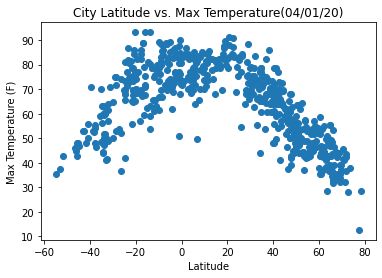

In [10]:
plt.scatter(x=data["Lat"], y=data["Max Temp"])
plt.title("City Latitude vs. Max Temperature(04/01/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

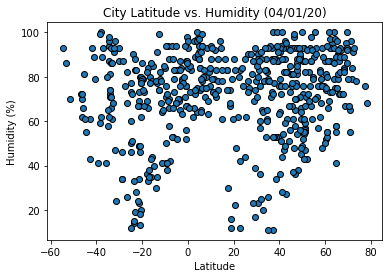

In [11]:
plt.scatter(x=data["Lat"], y=data["Humidity"], edgecolor="black")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

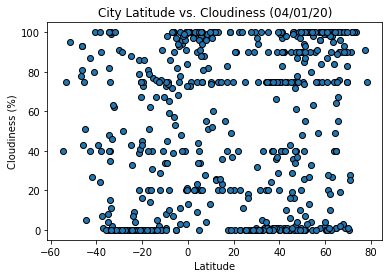

In [12]:
plt.scatter(x=data["Lat"], y=data["Cloudiness"], edgecolor="black")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")


## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

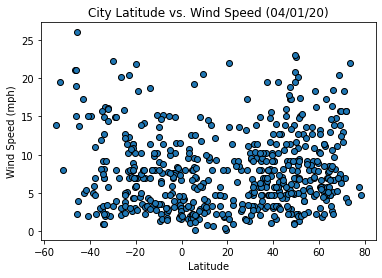

In [13]:
plt.scatter(x=data["Lat"], y=data["Wind Speed"], edgecolor="black")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")



## Linear Regression

In [14]:
northern = data.loc[data["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = data.loc[data["Lat"] < 0.0]
southern.reset_index(inplace=True)
southern

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Bredasdorp,-34.53,20.04,44.60,87,48,9.17,ZA,1601176563
1,1,Punta Arenas,-53.15,-70.92,37.40,86,75,19.46,CL,1601176330
2,4,Kaitangata,-46.28,169.85,45.00,62,93,15.01,NZ,1601176315
3,7,Kavieng,-2.57,150.80,83.66,79,94,11.54,PG,1601176565
4,9,Mahébourg,-20.41,57.70,69.80,77,75,6.93,MU,1601176566
...,...,...,...,...,...,...,...,...,...,...
188,542,Buin,-33.73,-70.75,51.80,71,0,2.24,CL,1601176731
189,543,Zorritos,-3.68,-80.68,69.04,76,11,7.16,PE,1601176732
190,545,São Geraldo do Araguaia,-6.40,-48.55,77.86,66,7,1.54,BR,1601176732
191,561,Omboué,-1.57,9.26,74.37,80,99,8.32,GA,1601176634


In [15]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern["Lat"], northern["Max Temp"])

# Get regression values
regress_values = northern["Lat"] * slope + intercept
print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

0      63.502118
1      51.401645
2      61.838892
3      61.636881
4      65.205746
         ...    
368    60.997179
369    67.374000
370    61.778289
371    46.782322
372    60.579689
Name: Lat, Length: 373, dtype: float64
y = -0.67x +88.28


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.725493665043447


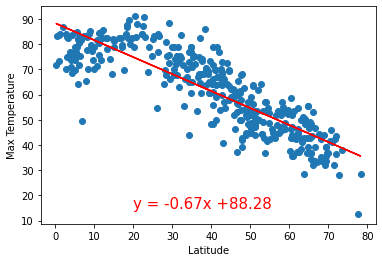

In [16]:
# Create Plot
plt.scatter(northern["Lat"], northern["Max Temp"])
plt.plot(northern["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0      57.941476
1      44.067062
2      49.186139
3      81.755993
4      68.462783
         ...    
188    58.537584
189    80.928893
190    78.902125
191    82.501128
192    79.990023
Name: Lat, Length: 193, dtype: float64
y = 0.75x +83.67


ValueError: x and y must have same first dimension, but have shapes (193,) and (373,)

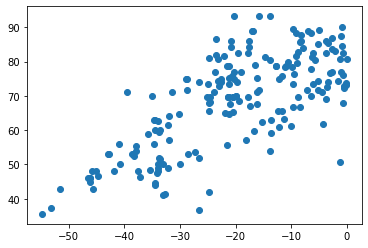

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern["Lat"], southern["Max Temp"])

# Get regression values
regress_values_2 = southern["Lat"] * slope + intercept
print(regress_values_2)
line_eq_2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_2)

# Create Plot
plt.scatter(southern["Lat"], southern["Max Temp"])
plt.plot(southern["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression